The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [55]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Start coding here!

In [56]:
# info about data
nobel = pd.read_csv('data/nobel.csv')
print(nobel.head(5))
print(nobel.info())
print(nobel.describe())
print('Rows and columns: ', nobel.shape)

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city      

## 1. What is the most commonly awarded gender and birth country?
Store your answers as string variables top_gender and top_country.

In [57]:
# check the gaps in the columns sex and birth_country
nobel[['sex', 'birth_country']].isna().sum()

sex              30
birth_country    31
dtype: int64

In [58]:
# top_gender
top_gender = nobel['sex'].value_counts().idxmax()
gender_counts = nobel['sex'].value_counts()
print('Top gender of Nobel prize: ', top_gender )
print(gender_counts) 


Top gender of Nobel prize:  Male
Male      905
Female     65
Name: sex, dtype: int64


In [59]:
# top_country
top_country = nobel['birth_country'].value_counts().idxmax()
birth_country_counts = nobel['birth_country'].value_counts()
print('Top country of Nobel prize: ', top_country)
print(birth_country_counts.head())

Top country of Nobel prize:  United States of America
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Name: birth_country, dtype: int64


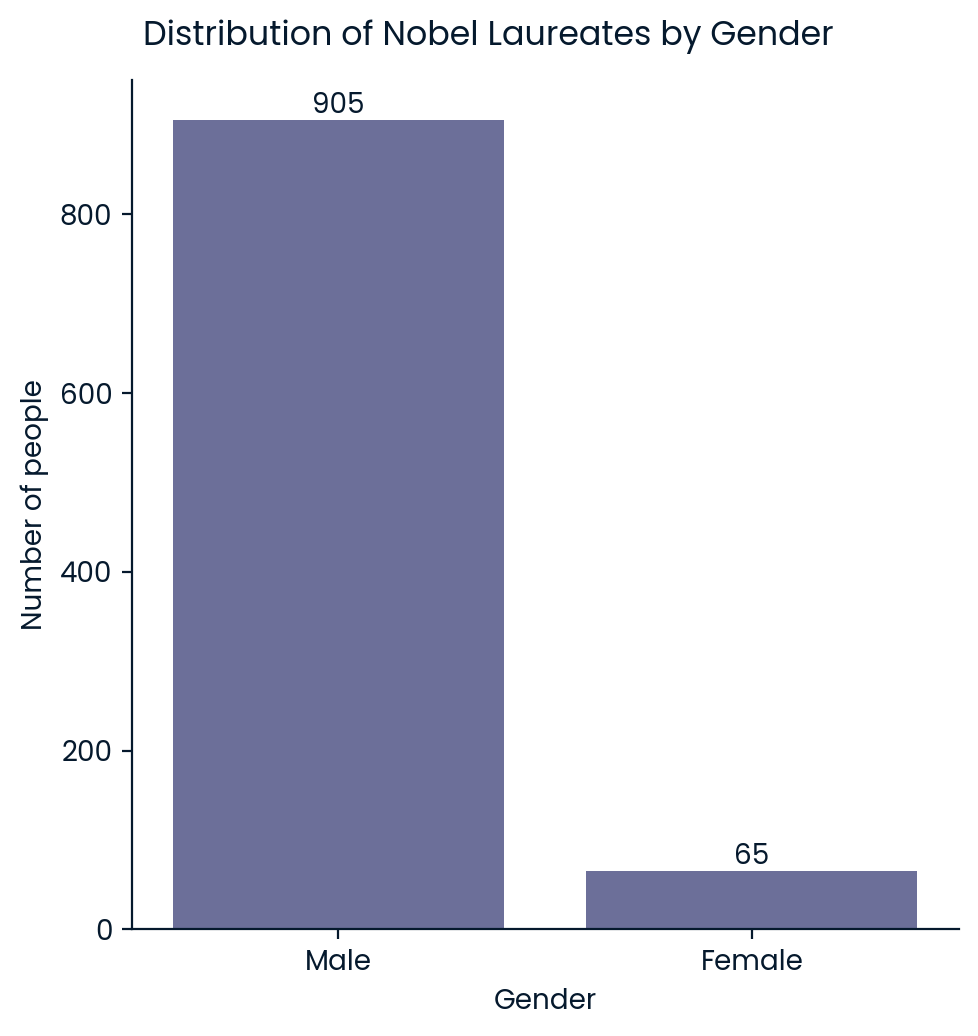

In [60]:
# plot for 'Distribution of Nobel Laureates by Gender'
g = sns.catplot(data=nobel, kind='count', x='sex')
g.fig.suptitle('Distribution of Nobel Laureates by Gender', y='1.03')
g.set(xlabel='Gender', ylabel='Number of people')
for bar in g.ax.patches:
    height = bar.get_height()            
    x = bar.get_x() + bar.get_width() / 2 
    y = height                          
    g.ax.text(x, y, int(height), ha='center', va='bottom')
plt.show()

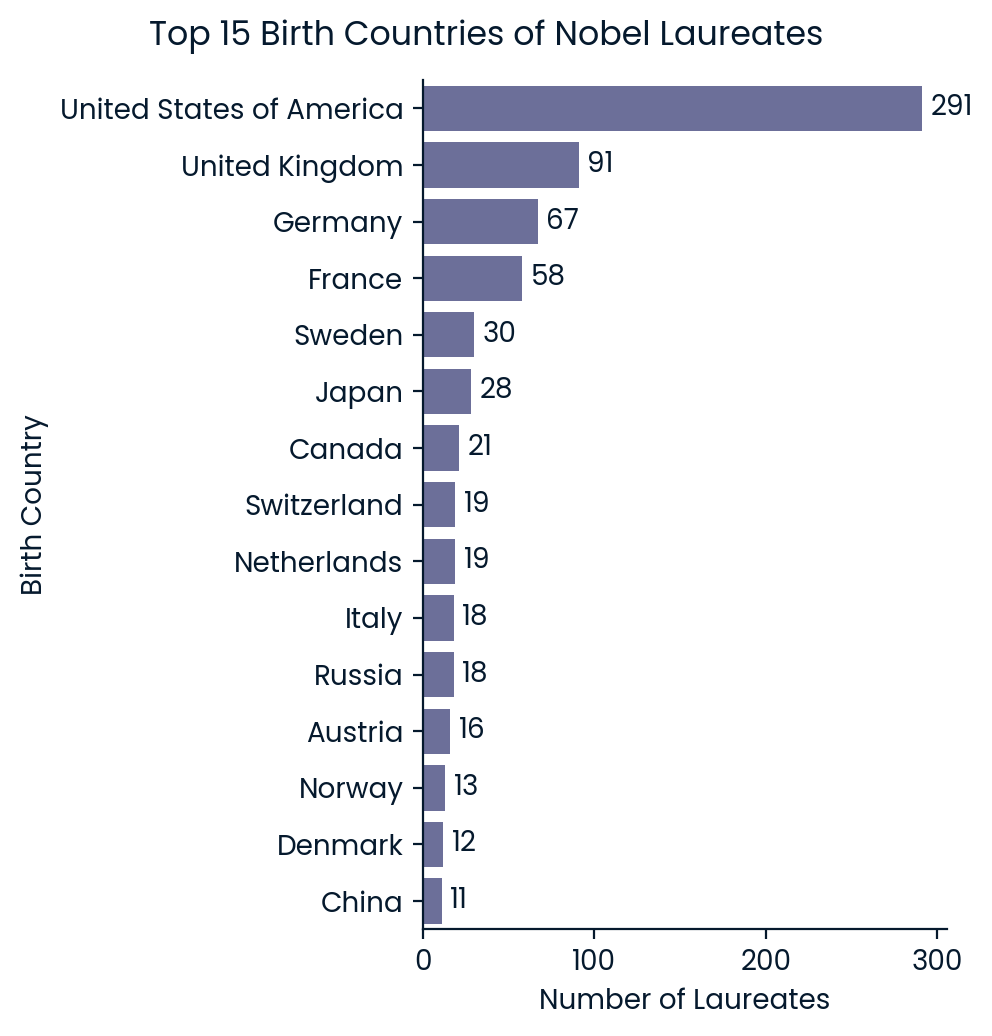

In [61]:
# top 15 countries 
top_countries_15 = nobel['birth_country'].value_counts().head(15).reset_index()
top_countries_15.columns = ['birth_country', 'count']
g = sns.catplot(data=top_countries_15, kind='bar', y='birth_country', x='count')
g.fig.suptitle('Top 15 Birth Countries of Nobel Laureates', y='1.03')
g.set(xlabel='Number of Laureates', ylabel='Birth Country')

# add label to bars
for bar in g.ax.patches:
    width = bar.get_width()            
    x = bar.get_x() + 5 + bar.get_width()
    y = bar.get_y() + bar.get_height() / 2                         
    g.ax.text(x, y, int(width), ha='left', va='center')
plt.show()

## Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
Store this as an integer called max_decade_usa.

In [62]:
# create a new column 'decades' indicating the decade for each prize year.
nobel['decades'] = nobel['year']//10 * 10 


In [63]:
# count the total number of laureates per decade (with non-null birth_country)
decades_countries = nobel.groupby('decades')['birth_country'].count()
print(decades_countries)
# count the number of US-born laureates per decade
decades_usa = nobel[nobel['birth_country'] == 'United States of America'].groupby('decades')['birth_country'].count()
print(decades_usa)

decades
1900     56
1910     38
1920     54
1930     55
1940     40
1950     71
1960     75
1970    103
1980     94
1990    101
2000    119
2010    117
2020     46
Name: birth_country, dtype: int64
decades
1900     1
1910     3
1920     4
1930    14
1940    13
1950    21
1960    21
1970    33
1980    31
1990    42
2000    52
2010    38
2020    18
Name: birth_country, dtype: int64


In [64]:
#
max_decade_usa = int((decades_usa / decades_countries * 100).idxmax())
print('The decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories: ', max_decade_usa)


The decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories:  2000


## Which decade and Nobel Prize category combination had the highest proportion of female laureates?
Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

In [92]:
# count the total number of laureates per decade (with non-null sex)
decades_gender = nobel.groupby(['decades', 'category'])['sex'].count()
print(decades_gender)

# count the number of female laureates per decade
decades_female = nobel[nobel['sex'] == 'Female'].groupby(['decades', 'category'])['sex'].count()
print(decades_female)

decades_female_rate = (decades_female / decades_gender).fillna(0)
decades_female_rate_max = decades_female_rate.idxmax()
print(decades_female_rate_max)

max_female_dict = {decades_female_rate_max[0]: decades_female_rate_max[1]}
print('Decade and Nobel Prize category combination had the highest proportion of female laureates', max_female_dict)

decades  category  
1900     Chemistry      9
         Literature    10
         Medicine      11
         Peace         13
         Physics       13
                       ..
2020     Economics      9
         Literature     4
         Medicine       8
         Peace          4
         Physics       12
Name: sex, Length: 72, dtype: int64
decades  category  
1900     Literature    1
         Peace         1
         Physics       1
1910     Chemistry     1
1920     Literature    2
1930     Chemistry     1
         Literature    1
         Peace         1
1940     Literature    1
         Medicine      1
         Peace         1
1960     Chemistry     1
         Literature    1
         Physics       1
1970     Medicine      1
         Peace         3
1980     Medicine      3
         Peace         1
1990     Literature    3
         Medicine      1
         Peace         3
2000     Chemistry     1
         Economics     1
         Literature    3
         Medicine      4
         Peac

## Who was the first woman to receive a Nobel Prize, and in what category?
Save your string answers as first_woman_name and first_woman_category.

## Which individuals or organizations have won more than one Nobel Prize throughout the years?
Store the full names in a list named repeat_list.

In [65]:
#find index individuals or organizations have won more than one Nobel Prize
ind_org = nobel['laureate_id'].value_counts()
ind_org_ids = ind_org[ind_org > 1].index
print('Index for winner more than 1 time: ', ind_org_ids)

# filter rows 
repeat = nobel[nobel['laureate_id'].isin(ind_org_ids)]
print(repeat)
repeat_list = list(repeat['full_name'].unique())
print(repeat_list)

# 7 индексов [482, 217, 66, 222, 6, 515, 743]

Index for winner more than 1 time:  Int64Index([482, 217, 66, 222, 6, 515, 743], dtype='int64')
     year   category  ...             death_country decades
19   1903    Physics  ...                    France    1900
62   1911  Chemistry  ...                    France    1910
89   1917      Peace  ...                       NaN    1910
215  1944      Peace  ...                       NaN    1940
278  1954  Chemistry  ...  United States of America    1950
283  1954      Peace  ...                       NaN    1950
298  1956    Physics  ...  United States of America    1950
306  1958  Chemistry  ...            United Kingdom    1950
340  1962      Peace  ...  United States of America    1960
348  1963      Peace  ...                       NaN    1960
424  1972    Physics  ...  United States of America    1970
505  1980  Chemistry  ...            United Kingdom    1980
523  1981      Peace  ...                       NaN    1980
721  2001  Chemistry  ...                       NaN    2000
975 